In [1]:
import numpy as np 
import keras
import pickle
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.models import Model
plt.ion()
import cv2


/home/astra/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
with open('train_data.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('test_data.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
# random.shuffle(train_data)
# random.shuffle(test_data)

In [4]:
len(train_data)

3624

In [5]:
len(test_data)

1057

In [6]:
train_data_list = []
train_label = []
test_data_list = []
test_label = []

In [7]:
for d in train_data:
    train_data_list.append(d[1])
    train_label.append(d[0])

train_data_list = np.array(train_data_list)
train_label = np.array(train_label)
del train_data

In [8]:
train_data_list.shape

(3624, 224, 224, 3)

In [9]:
for d in test_data:
    test_data_list.append(d[1])
    test_label.append(d[0])

test_data_list = np.array(test_data_list)
test_label = np.array(test_label)
del test_data

In [10]:
test_label

array(['105', '105', '105', ..., '115', '115', '115'], dtype='<U3')

In [11]:
train_data_list.astype('float64')
test_data_list.astype('float64')
train_label = to_categorical(train_label, 151)
test_label = to_categorical(test_label, 151)

In [12]:
test_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

14


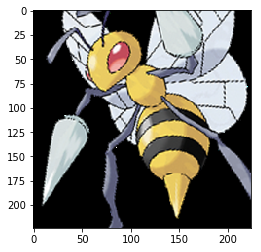

In [13]:
train_data_list.dtype
plt.imshow(train_data_list[92])
print(np.argmax(train_label[92]))

In [14]:
np.max(train_data_list[0])

1.0

105


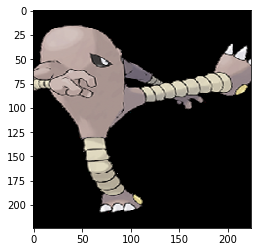

In [15]:
train_data_list.dtype
plt.imshow(test_data_list[0])
print(np.argmax(test_label[0]))

In [16]:
train_X, train_y, test_X, test_y = train_data_list, train_label, test_data_list, test_label

In [17]:
print(train_X.shape)
print(train_y.shape)

(3624, 224, 224, 3)
(3624, 151)


In [18]:
base = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape = (224, 224, 3))

In [19]:
x = base.output
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predict = Dense(151, activation='softmax')(x)

In [20]:
model = Model(inputs=base.input, outputs=predict)

for layer in base.layers:
    layer.trainable = False

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=["accuracy"])

In [57]:
# train_X, train_y, test_X, test_y
batch_size = 128
epochs = 10

In [58]:
model.fit(train_X, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_X, test_y),
          shuffle=True)

Train on 3624 samples, validate on 1057 samples
Epoch 1/10
3624/3624 [==============================] - 15s 4ms/step - loss: 0.3355 - acc: 0.8874 - val_loss: 0.0867 - val_acc: 0.9763
Epoch 2/10
3624/3624 [==============================] - 15s 4ms/step - loss: 0.3061 - acc: 0.8951 - val_loss: 0.0825 - val_acc: 0.9792
Epoch 3/10
3624/3624 [==============================] - 15s 4ms/step - loss: 0.2961 - acc: 0.9004 - val_loss: 0.0834 - val_acc: 0.9763
Epoch 4/10
3624/3624 [==============================] - 15s 4ms/step - loss: 0.2743 - acc: 0.9095 - val_loss: 0.0822 - val_acc: 0.9792
Epoch 5/10
3624/3624 [==============================] - 15s 4ms/step - loss: 0.2686 - acc: 0.9059 - val_loss: 0.0835 - val_acc: 0.9792
Epoch 6/10
3624/3624 [==============================] - 15s 4ms/step - loss: 0.2684 - acc: 0.9109 - val_loss: 0.0801 - val_acc: 0.9763
Epoch 7/10
3624/3624 [==============================] - 15s 4ms/step - loss: 0.2664 - acc: 0.9117 - val_loss: 0.0796 - val_acc: 0.9773
Epoch 8

In [59]:
# img = (test_data_list[0])
# print(img.dtype)
# cv2.imwrite('25.png', img)

In [60]:
# np.max(img)

In [61]:
((test_data_list[0]*255)).dtype

dtype('float64')

In [62]:
def data_name_dict():
    raw_data = {}
    with open('data_info.txt', 'r', encoding='utf-8') as f:
        while True:
            raw = f.readline()
            if raw == '':
                break
            number = int(raw.split('\t')[0].split('#')[-1])
            name = raw.split('\t')[3].split('*')[0]
            raw_data[number] = name
    return raw_data

raw_data = data_name_dict()

def test(fn, model=model, raw_data=raw_data):
    
    img = cv2.imread(fn)[:,:,::-1]
    img = cv2.resize(img, (224,224))
    img = img / 255
    plt.imshow(img)
    img_tensor = np.expand_dims(img, axis=0)
    output = model.predict(img_tensor)
    print(np.max(output))
    print(np.argmax(output)+1)
    print("output: {}".format(raw_data[np.argmax(output)+1])) 
    


0.94835055
25
output: 皮卡丘


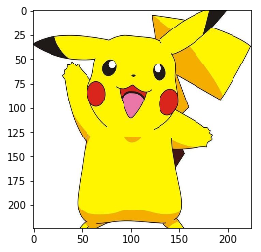

In [63]:
test('pika.jpg', model, raw_data)



0.4002058
143
output: 卡比獸


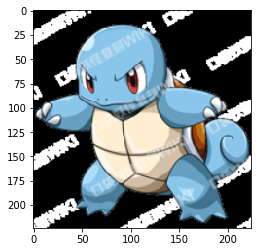

In [64]:
test('jeni_2.png')

0.99978644
127
output: 凱羅斯


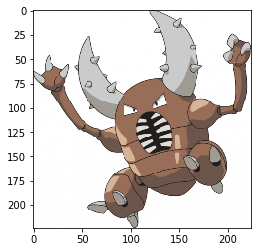

In [65]:
test('daja.jpg')

0.5876637
7
output: 傑尼龜


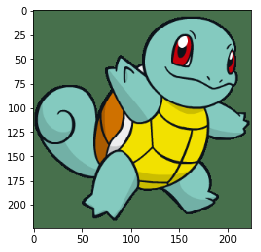

In [66]:
test('jeni_1.png')

0.98945767
25
output: 皮卡丘


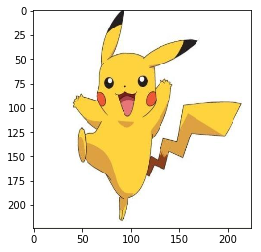

In [67]:
test('pika2.jpg')

In [68]:
model.save('pokemon.h5')

In [34]:
# class DataGenerator(keras.utils.Sequence):

#     def __init__(self, datas, labels, batch_size=1, shuffle=True):
#         self.batch_size = batch_size
#         self.datas = datas
#         self.labels = labels
#         self.indexes = np.arange(len(self.datas))
#         self.shuffle = shuffle

#     def __len__(self):
#         #计算每一个epoch的迭代次数
#         return math.ceil(len(self.datas) / float(self.batch_size))

#     def __getitem__(self, index):
#         #生成每个batch数据，这里就根据自己对数据的读取方式进行发挥了
#         # 生成batch_size个索引
#         batch_indexs = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
#         # 根据索引获取datas集合中的数据
#         batch_datas = [(self.labels[k], self.datas[k]) for k in batch_indexs]

#         # 生成数据
#         X, y = self.data_generation(batch_datas)

#         return X, y

#     def on_epoch_end(self):
#         #在每一次epoch结束是否需要进行一次随机，重新随机一下index
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

#     def data_generation(self, batch_datas):
#         images = []
#         labels = []

#         # 生成数据
#         for data in batch_datas:
#             images.append(data[1])
#             labels.append(data[0])
            
#         return np.array(images), np.array(labels)


In [35]:
# training_generator = DataGenerator(train_datas)